# **<<< Only Problem 1 and 2 will be graded >>>**

## Problem 1 (sound)
Denoising time with FFT (DFT)

In [24]:
# !pip install praat-parselmouth

In [25]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import IPython.display as ipd
import os

# import librosa
# import parselmouth

In [26]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h = np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

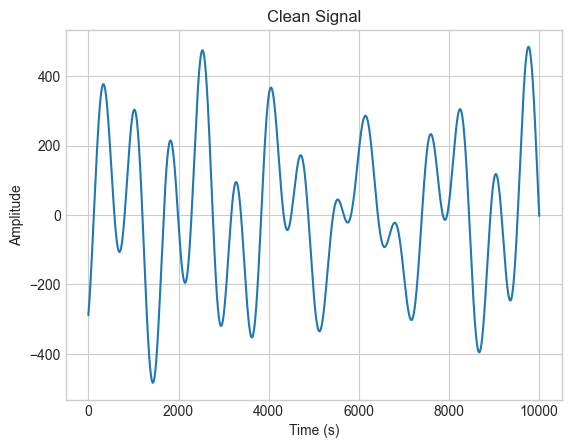

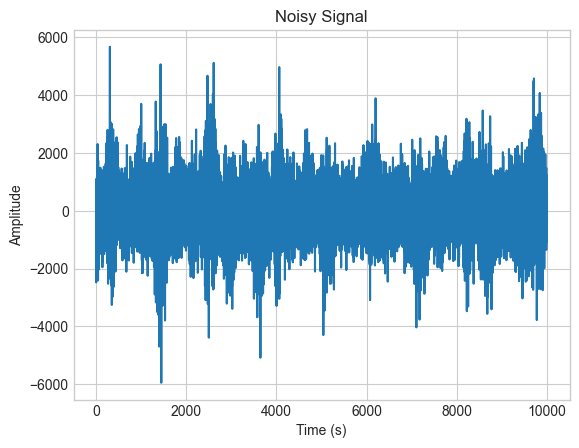

In [27]:
# # TODO 1.1 : plot (1) clean signal and (2) noisy signal with label
plt.plot(t, h, label="Clean Signal")
plt.title("Clean Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot (2) Noisy signal
plt.plot(t, h_w_noise, label="Noisy Signal")
plt.title("Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

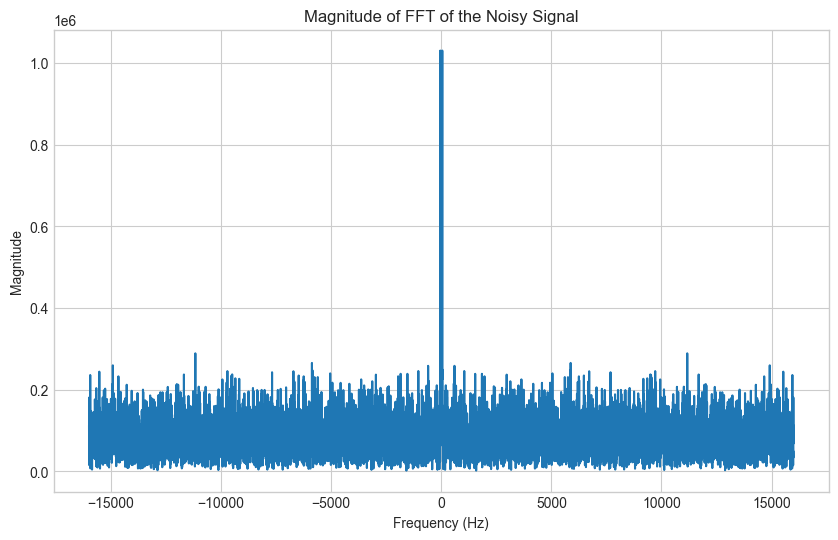

-------------------------------------------------
original


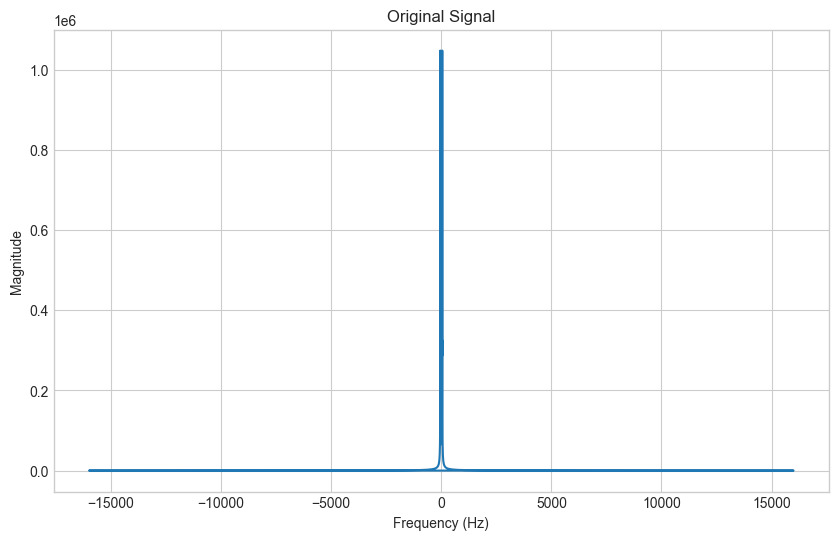

In [28]:
# TODO 1.2: plot magnitude of FFT of the noisy signal (freq sort form min--> max)
H_w_noise_fft = np.fft.fft(h_w_noise)
magnitude = np.abs(H_w_noise_fft)
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

sorted_indices = np.argsort(frequencies)

sorted_frequencies = frequencies[sorted_indices]
sorted_magnitude = magnitude[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(sorted_frequencies, sorted_magnitude)
plt.title('Magnitude of FFT of the Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

print("-------------------------------------------------")
print("original")

H_w_fft = np.fft.fft(h)
magnitude = np.abs(H_w_fft)
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude)
plt.title('Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [29]:
# #test ifft
# t = np.arange(0,5,0.01)
# y = np.cos(2*np.pi*t)
# plt.plot(t, y)
# plt.show()

# y_back = np.fft.ifft(np.fft.fft(y)).real
# plt.plot(t, y_back)
# plt.show()

In [30]:
def lowpass_filter(magnitude):
    thr = np.sort(magnitude)[-5]
    result = []
    for a in magnitude:
        if(a>=thr):
            result.append(np.abs(magnitude[i])*0.9)
        else:
            result.append(0)
    return np.array(result)

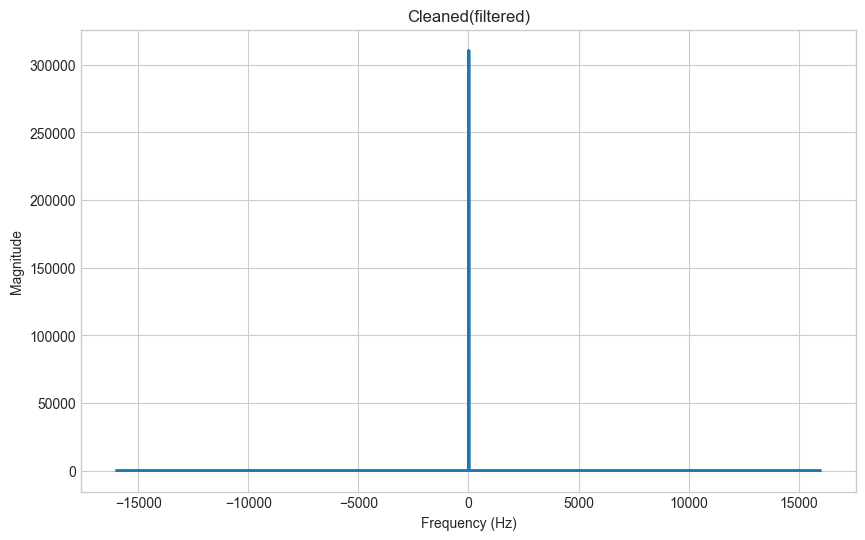

In [31]:
# TODO 1.3 : cleaning the noisy signal using magnitude of FFT
H_cleaned = lowpass_filter(H_w_noise_fft)
h_cleaned = (np.fft.ifft(H_cleaned)).real

plt.figure(figsize=(10, 6))
plt.plot(frequencies, H_cleaned)
plt.title("Cleaned(filtered)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

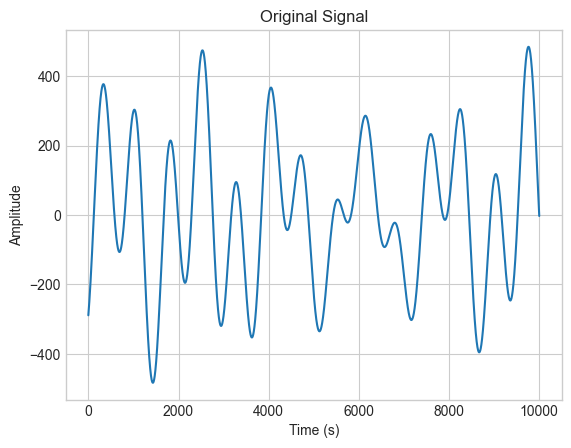

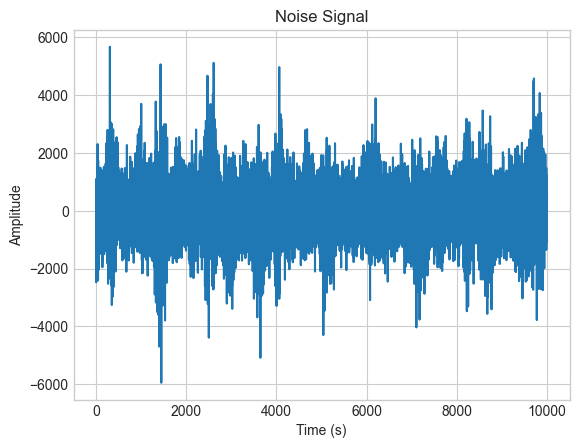

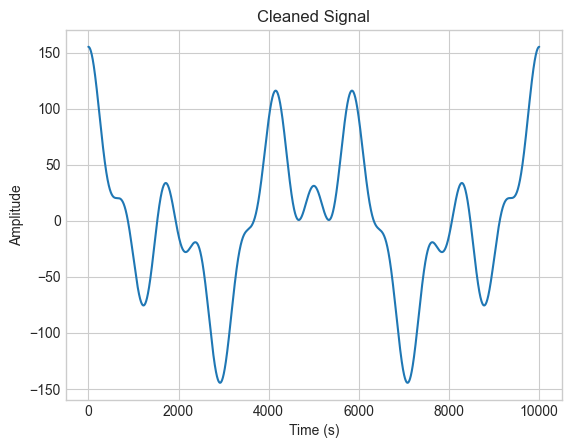

In [32]:
# TODO 1.4 : plot clean signal, noise signal and filtered signal (from your result in TODO 3.3) with label
plt.plot(t, h)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.plot(t, h_w_noise)
plt.title("Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.plot(t, h_cleaned)
plt.title("Cleaned Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [33]:
# TODO 1.5 : export with IPython.display, listen to (1) original signal (2) signal with noise (3) signal after filtered
print("Original Signal:")
ipd.display(ipd.Audio(data=h, rate=sampling_rate))

print("Noisy Signal:")
ipd.display(ipd.Audio(data=h_w_noise, rate=sampling_rate))

print("Cleaned(filtered) Signal:")
ipd.display(ipd.Audio(data=h_cleaned, rate=sampling_rate))

Original Signal:


Noisy Signal:


Cleaned(filtered) Signal:


In [34]:
# TODO 1.6 : Write to explain and analyze the results

clean noise โดยการใช้filter โดยให้ ความถี่ที่มีmagnitude สูงกว่า 5th dominant frequency ผ่านเท่านั้น
ผลที่ได้ค่อนข้างคล้ายกับต้นฉบับแต่จะแหลมกว่าในบางครั้ง สามารถปรับประสิทธิภาพในการcleanได้โดยการลองเปลี่ยนค่าว่าเอาdominant frequency อันดับเท่าไหร่เป็น threshould

## Problem 2 (image FFT)
Download a 1000 x 1000 image ("hamtaro.png") below

<a href="https://ibb.co/kHTjZbb"><img src="https://i.ibb.co/kHTjZbb/hamtaro.png" alt="hamtaro" border="0"></a>

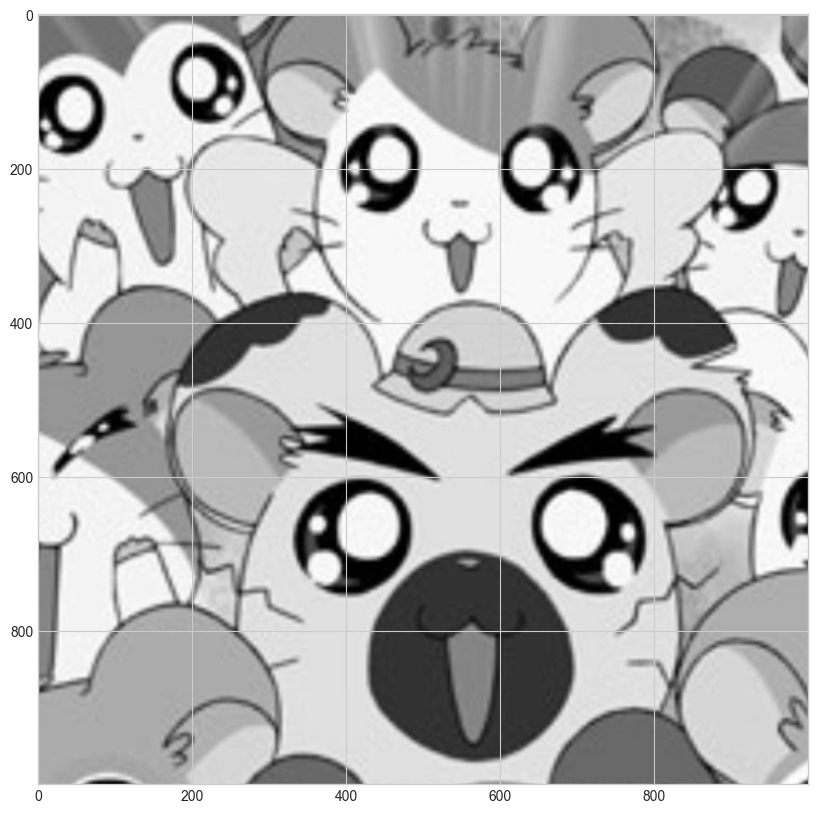

In [35]:
screen_shot = cv2.imread('hamtaro.png',0)

plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

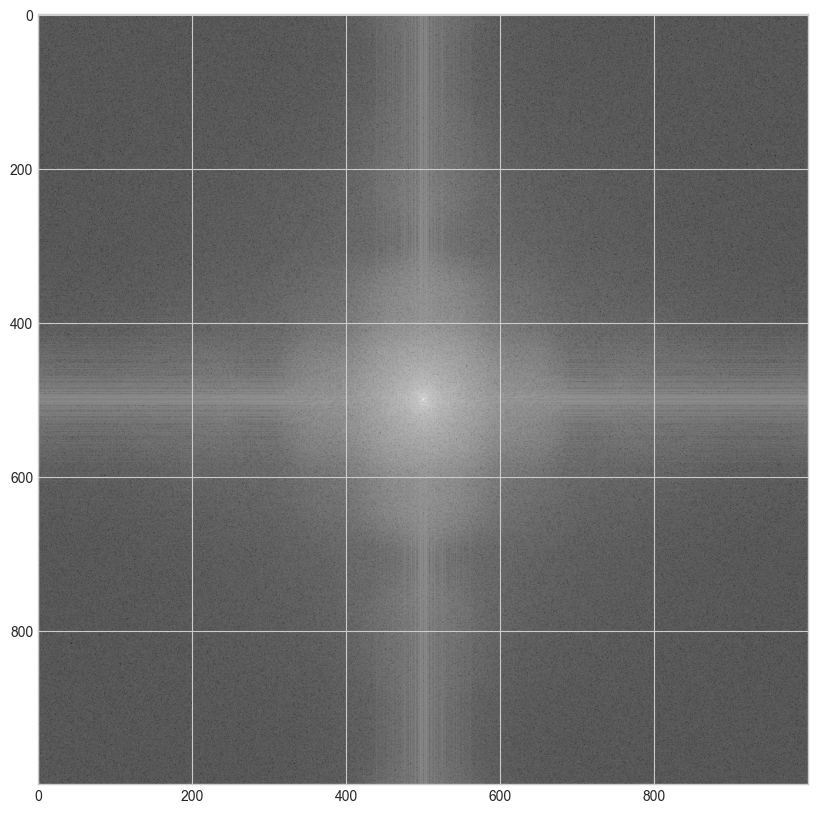

In [36]:
# Apply FFT to the given image
F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

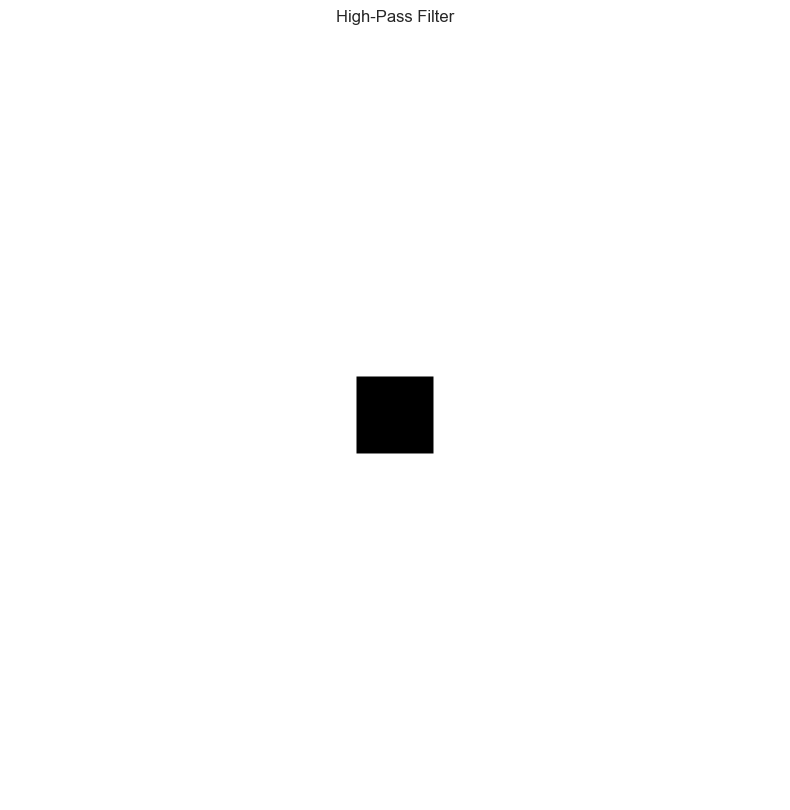

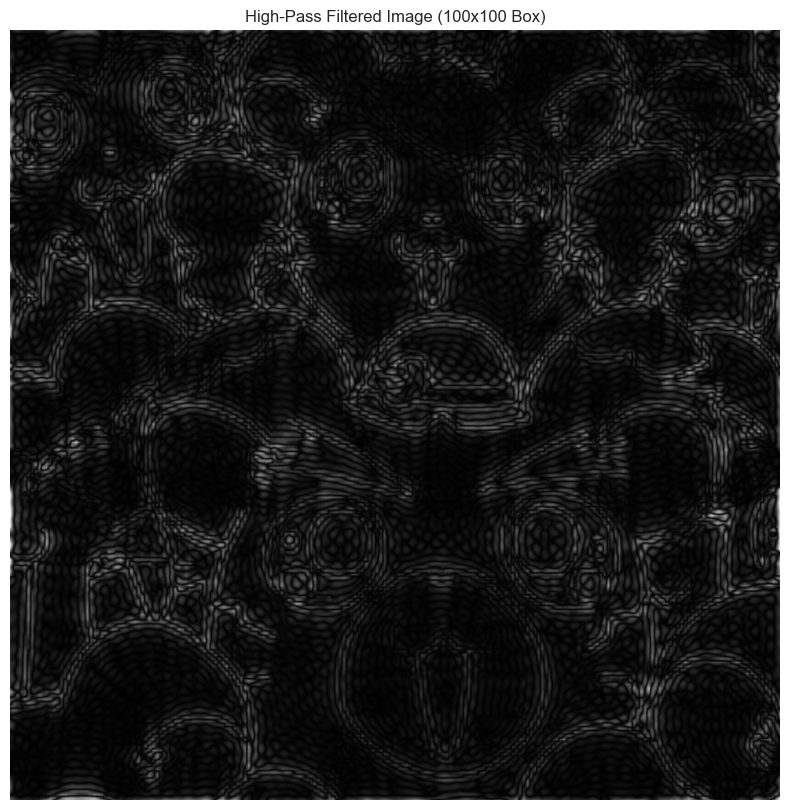

In [37]:
# TODO 2.1 : Implement an ideal high-pass filter with a box size of 100x100 pixels on the given image

rows, cols = screen_shot.shape
# Create a mask
high_pass_mask = np.ones((rows, cols), dtype=np.float32)

# Create a central square of zeros (low-pass removal region)
n = 100  # 100x100 box
center_row, center_col = rows // 2, cols // 2
high_pass_mask[center_row - n//2:center_row + n//2, center_col - n//2:center_col + n//2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(high_pass_mask, cmap='gray')
plt.title('High-Pass Filter')
plt.axis('off')
plt.show()

# Apply the filter
F2_filtered = F2 * high_pass_mask

# Perform IFFT Shift and IFFT
F1_filtered = fftpack.ifftshift(F2_filtered)
image_filtered = fftpack.ifft2(F1_filtered)
image_filtered = np.abs(image_filtered)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image_filtered, cmap='gray')
plt.title('High-Pass Filtered Image (100x100 Box)')
plt.axis('off')
plt.show()

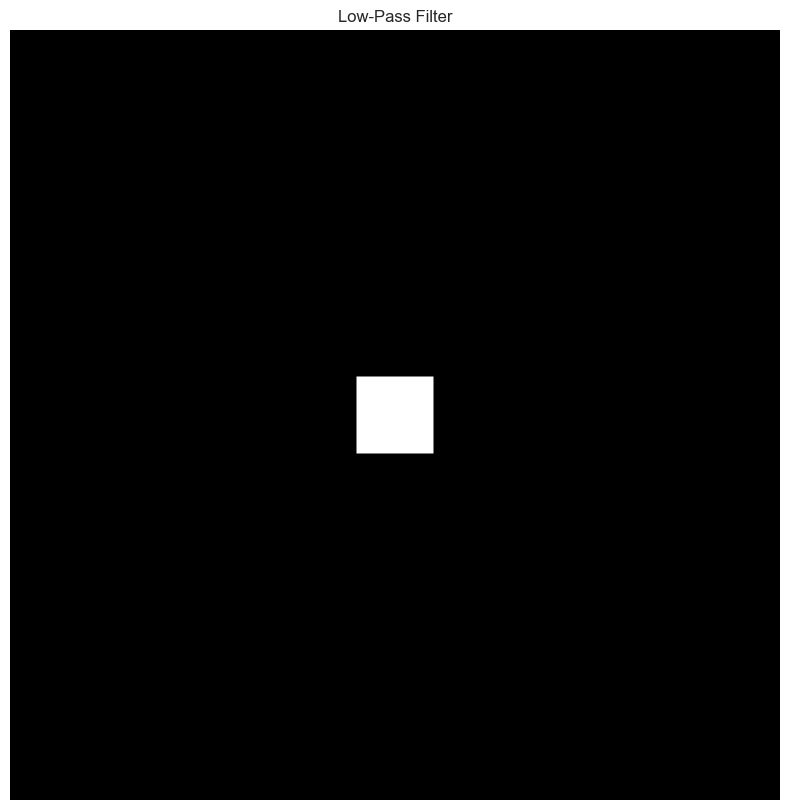

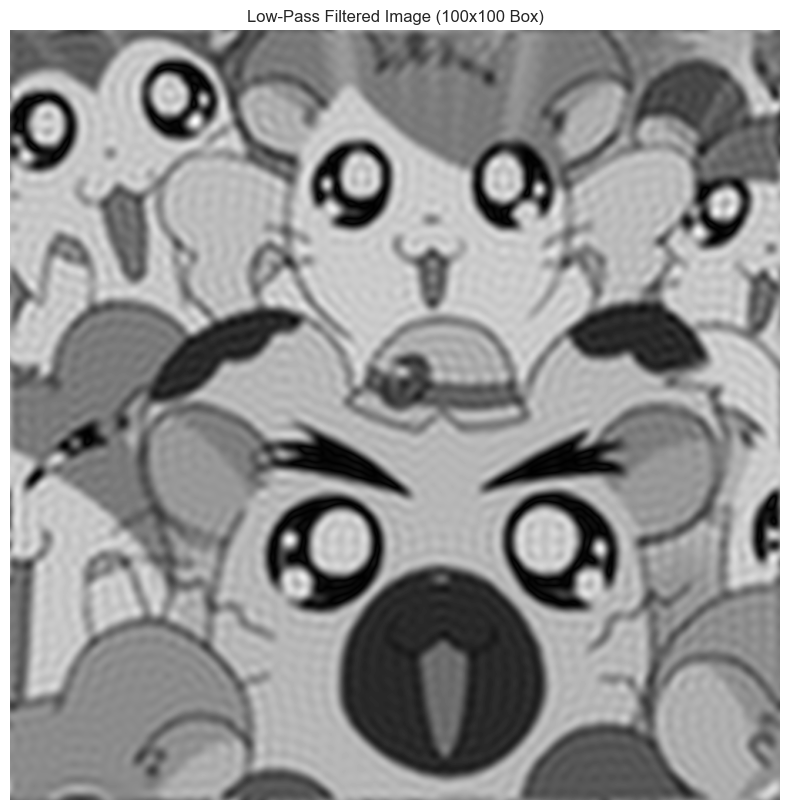

In [38]:
# TODO 2.2 : Implement an ideal low-pass filter with a box size of 100x100 pixels on the given image

rows, cols = screen_shot.shape
# Create a mask
low_pass_mask = np.zeros((rows, cols), dtype=np.float32)

# Create a central square of zeros (low-pass removal region)
n = 100  # 100x100 box
center_row, center_col = rows // 2, cols // 2
low_pass_mask[center_row - n//2:center_row + n//2, center_col - n//2:center_col + n//2] = 1
plt.figure(figsize=(10, 10))
plt.imshow(low_pass_mask, cmap='gray')
plt.title('Low-Pass Filter')
plt.axis('off')
plt.show()

# Apply the filter
F2_filtered = F2 * low_pass_mask

# Perform IFFT Shift and IFFT
F1_filtered = fftpack.ifftshift(F2_filtered)
image_filtered = fftpack.ifft2(F1_filtered)
image_filtered = np.abs(image_filtered)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image_filtered, cmap='gray')
plt.title('Low-Pass Filtered Image (100x100 Box)')
plt.axis('off')
plt.show()

## Problem 3

A digital signal can be generated from sampling of an analog signal using a periodic impulse-train. Explain how you can reconstruct an analog signal from a digital signal and aliasing problem does not occur when $f_s \leq 2f_{max} $ using frequency analysis.

where $f_s$ is the sampling frequency and $f_{max} $ is the maximum frequency of the analog signal

HINT :  $ \mathscr{F} \left\{ \sum_{n=-\infty}^{\infty} \delta (t-n T_s) \right\} = \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_s)$ if $\omega_s = \frac{2\pi}{T_s} = 2\pi f_s$


## Problem 4 : Aliasing

### Problem 4.1

The following code generates two sine waves (x01_ts01 and x02_ts01) which are sampled in a range of t = 0,0.05 with sampling rate = 5000 Hz (f_samp_01). Study and write a report to analyze the results.

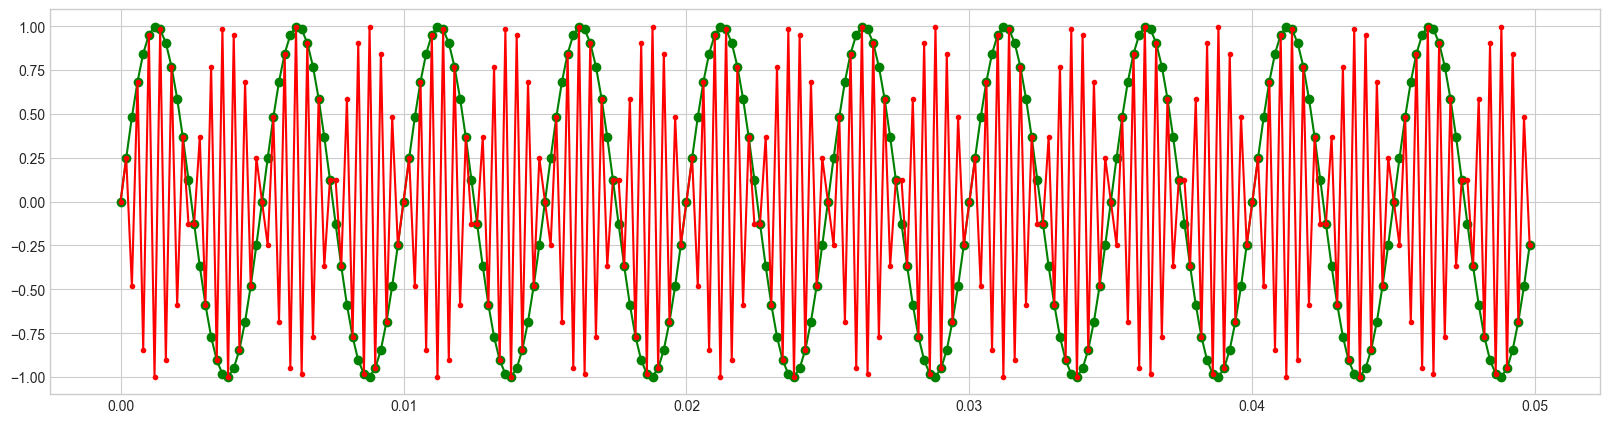

In [39]:
t_st = 0
t_end = 0.05
f_01 = 200
f_02 = 2300

f_samp_01 = 5000

ts01 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_01), endpoint=False)
x01_ts01 = np.sin(2*np.pi*f_01*ts01)
x02_ts01 = np.sin(2*np.pi*f_02*ts01)

plt.figure(figsize=(20, 5))
plt.plot(ts01, x01_ts01, 'go-', ts01, x02_ts01, 'r.-')
plt.show()

The sampling rate is reduced to 2500 Hz (f_samp_02). Study and write a report to compare the results.



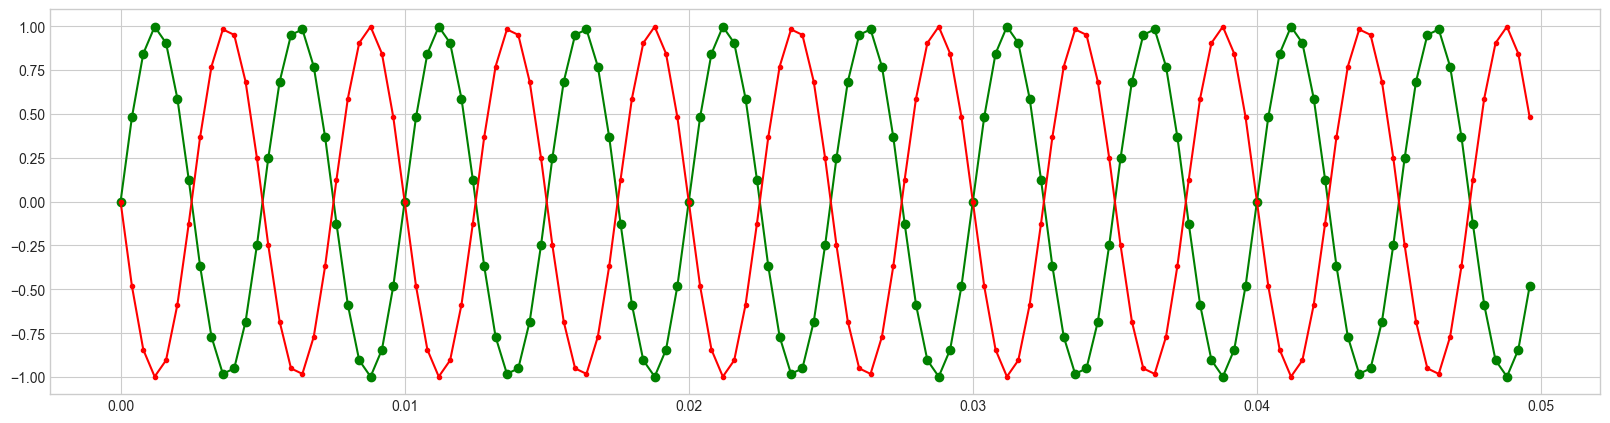

In [40]:
f_samp_02 = 2500
ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)
x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)

plt.figure(figsize=(20, 5))
plt.plot(ts02, x01_ts02, 'go-', ts02, x02_ts02, 'r.-')
plt.show()

Ans.

### Problem 4.2
The following code generate audio signals at different frequencies. Play the sound and write a report the analyse the results.

In [41]:
t_st = 0
t_end = 5
f_01 = 50
f_02 = 22050 - f_01
f_03 = 22050 + f_01
f_samp_02 = 22050

ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)

# CREATE SIGNAL WITH DIFFERENT FREQ

x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)
x03_ts02 = np.sin(2*np.pi*f_03*ts02)

In [42]:
x02_ts02

array([ 0.        , -0.0142471 , -0.02849132, ...,  0.04272974,
        0.02849132,  0.0142471 ])

In [43]:
ipd.Audio(x01_ts02, rate=f_samp_02)

In [44]:
ipd.Audio(x02_ts02, rate=f_samp_02)

In [45]:
ipd.Audio(x03_ts02, rate=f_samp_02)



<a href="https://imgflip.com/i/4djx2z"><img src="https://i.imgflip.com/4djx2z.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

###  TODO : write report
Ans:

### Problem 4.3
### why many of audio file use sampling rate 44.1 kHz


Ans:

### Problem 5
Download the 3 audio files and analyze all 3 signals with preliminary analysis.
(HINT : Use a log scale for both frequency and magnitude.)"

1. bass-guitar-single-note --> mixkit-bass-guitar-single-note-2331.wav

explain pattern of signal

In [46]:
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-adult-sneeze-2212.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-child-deep-breath-2237.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-bass-guitar-single-note-2331.wav

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
